## Suicide Analysis

In this project, I'm going to analyze suicide rates in different countries and come up with good conclusions.

The first step is to import libraries and data.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from numpy import array

# create a color palette
palette = plt.get_cmap('Set1')
#define style
plt.style.use('ggplot')
#ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#create a dataframe, rename columns and drop one
df = pd.read_csv('suicide_data.csv')
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicides_per_100k', 
              'country_year', 'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation']
df.drop('country_year', axis=1, inplace=True) #this column is not necessary

#Cleaning and some exploratory analysis to understand what I'm working with
df.info() #a lot of nulls in HDI for year, let's leave it there, but we might not use it
df.describe() #no weird or negative numbers

#Okay, I need to convert the gdp_for_year from string to numeric
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','')
df['gdp_for_year'] = pd.to_numeric(df['gdp_for_year'])
df.dtypes #okay, everything looks good now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides_per_100k    27820 non-null float64
hdi_for_year         8364 non-null float64
gdp_for_year         27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides_per_100k    float64
hdi_for_year         float64
gdp_for_year           int64
gdp_per_capita         int64
generation            object
dtype: object

I thought it would be interesting to add the continents to my data frame. So I found this really good dataset with all countries and continents and I'm going to merge it with my data frame.

In [4]:
#import continent information from csv and merge with dataframe
continent = pd.read_csv('./countryContinent.csv',encoding = "ISO-8859-1")
continent = continent[['country','continent']]
df = pd.merge(df, continent, on='country', how='left')

Okay, we're now good to go, let's start by analyzing the big picture, then we can dive deeper as we find interesting things.

### Big picture Analysis

#### On the first analysis I'm curious to see the mean of suicides per 100k by year
The first time I built this chart I noticed that 2016 doesn't have information for most of the countries, therefore the year will be excluded from my analysis, but I'm going to keep the column in case we need that in the future.

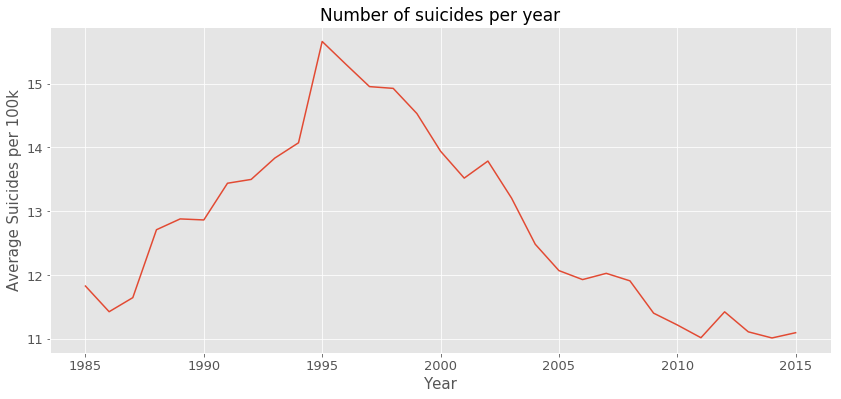

In [5]:
#Group by year, excluding 2016, and give me the mean of suicides per 100k.
df_total = df[df['year'] < 2016].groupby('year').mean()['suicides_per_100k'].reset_index()

#Assigning x and y values to different dataframes (x and y), so we can plot using these two frames.
x = df_total['year']
y = df_total['suicides_per_100k']

#Plot!
fig, ax = plt.subplots()
fig.set_size_inches(14,6)

ax.plot(x, y)
ax.set_title('Number of suicides per year', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Suicides per 100k', fontsize=15)
plt.show();

#### Conclusions based only on this chart:

   - 1995 was the peak in the number of suicides per 100k
   - Since then the number has a downward trend

Now, I want to see the same chart by genre, I'm curious to see if there's a big difference.
### By genre analysis

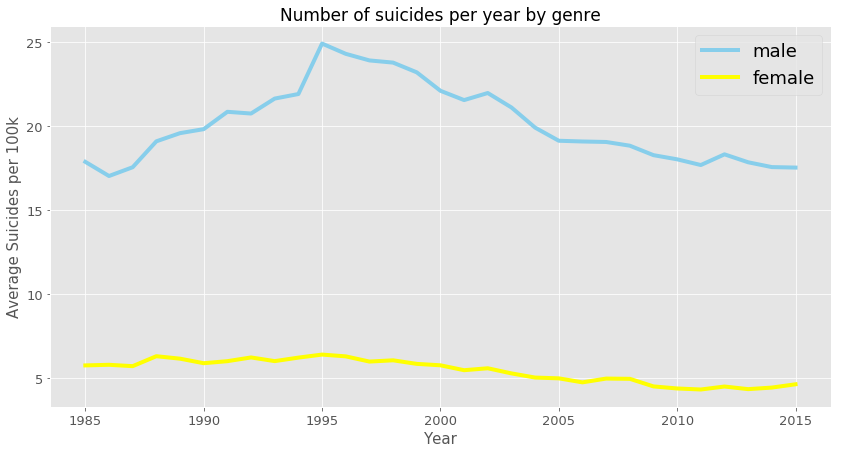

In [52]:
#Removing 2016 and grouping by year and sex, then calculating the mean of suicides per 100k
df_sex = df[df['year'] < 2016].groupby(['year','sex']).mean()['suicides_per_100k'].reset_index()
male = df_sex[df_sex['sex']=='male']
female = df_sex[df_sex['sex']=='female']

#Instantiate my x and y values.
#Male Portion:
x_m = male['year']
y_m = male['suicides_per_100k']
#Female Portion:
x_f = female['year']
y_f = female['suicides_per_100k']

#Plot!
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.plot(x_m, y_m, color='skyblue', linewidth=4, label='male')
ax.plot(x_f, y_f, color='yellow', linewidth=4, label='female')
plt.legend(prop={'size': 18})
plt.title('Number of suicides per year by genre', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Suicides per 100k', fontsize=15)
plt.show();

I'm surprised to see that the Average Number of Suicides for 'male' is a lot higher than the 'female' number at any point in time. Initially, I thought it would be higher, only based on my personal opinion of how women tend to be more responsible about life in general, really interesting ...

Okay, so since there's such big discrepancy, now I'm curious to see the ratio of male/female suicides.

In [7]:
#Ratio of mean male suicides per 100k / mean female suicides per 100k
ratio = male['suicides_per_100k'].mean()/female['suicides_per_100k'].mean()
ratio = round(ratio,2)
print('The overall ratio of male/female suicide is: ' + str(ratio))

The overall ratio of male/female suicide is: 3.69


In [8]:
#Clearly we can see that the peak for male was in 1995, but I'm not sure for the female portion.
male_yr_peak = male['year'][male['suicides_per_100k'].idxmax()]
male_peak = round(max(male['suicides_per_100k']),2)
female_yr_peak = female['year'][female['suicides_per_100k'].idxmax()] #1995
female_peak = round(max(female['suicides_per_100k']),2)
print('Year of peak of suicides was: ' + str(male_yr_peak) + ' for male and ' + str(female_yr_peak) + ' for female.')
print('Peak in number of suicides per 100k is Male: ' + str(male_peak) + ' and Female: ' + str(female_peak))

Year of peak of suicides was: 1995 for male and 1995 for female.
Peak in number of suicides per 100k is Male: 24.91 and Female: 6.42


As you can see above, the overall ratio between male and female is 3.69, which means that men commit suicide almost 4 times more than women. Moreover, the peak for both genres was in 1995. I wonder what happened in the previous years that led to this scenario...

Next, I guess it would be interesting to see the same ratio over time and understand if it's growing or not.

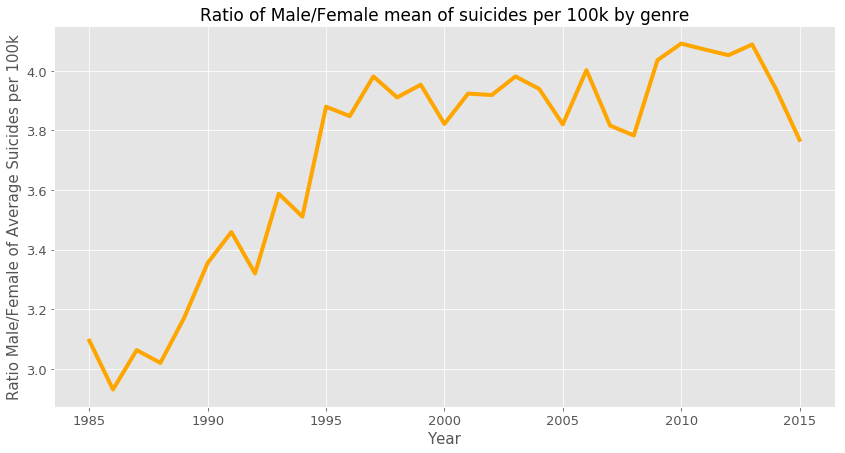

In [9]:
#Renaming columns for our analysis, so we can merge them
male.columns = ['year','male','suicides_per_100k_male']
female.columns = ['year','female','suicides_per_100k_female']

#Merge male and female dataframes and calculate the ratio
merge = pd.merge(male, female, on='year')
merge['ratio_men_female'] = merge['suicides_per_100k_male']/merge['suicides_per_100k_female']

#Plot!
y_total = merge['year']
x_total = merge['ratio_men_female']

#Plot!
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.plot(y_total, x_total, color='orange', linewidth=4)
plt.title('Ratio of Male/Female mean of suicides per 100k by genre', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio Male/Female of Average Suicides per 100k', fontsize=15);
plt.show();

From 1985 to 1997 the ratio increased from 3 to 4 and since then it's been between 4.2 and 3.8. 

I wonder if we have the same behavior in different places or if there's a continent where the average of male and female is lower or below 1.

### By Continent analysis

#### Average Suicides per 100k by Gender and Continent

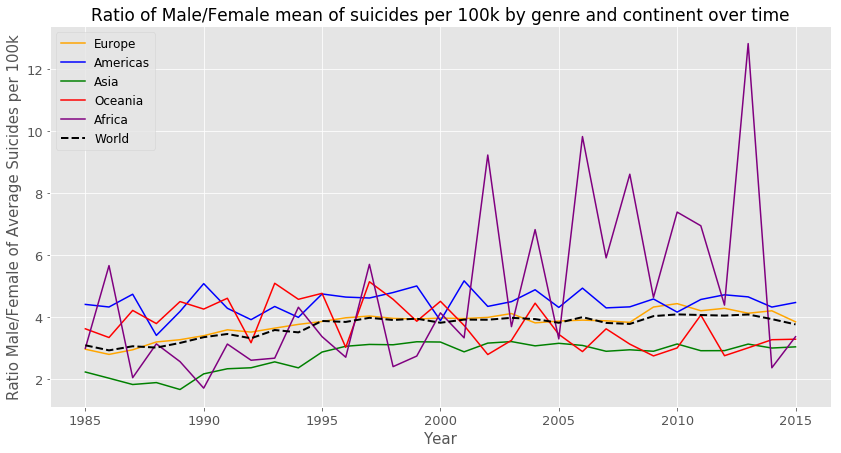

In [53]:
#Same process, but this time including 'continent' on the groupby function.
df_sex = df[df['year'] < 2016].groupby(['year','sex','continent']).mean()['suicides_per_100k'].reset_index()
male1 = df_sex[df_sex['sex']=='male']
female1 = df_sex[df_sex['sex']=='female']

#Merge male and female dataframes
to_plot = pd.merge(male1, female1, on=['year','continent'])
to_plot['ratio'] = to_plot['suicides_per_100k_x']/to_plot['suicides_per_100k_y']
to_plot = to_plot[['year','continent','ratio']]

#Create a list with the continents, I'm going to plot them through a loop.
continents = list(df['continent'].unique())

#Plot!
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

#Loop through list of continents.
for idx, continent in enumerate(continents):   
    colors = ['orange','blue','green','red','purple']
    chart = to_plot[to_plot['continent'] == continent]
    y = chart['ratio']
    x = chart['year']
    ax.plot(x,y, label=continent, color=colors[idx])

ax.plot(y_total, x_total, '--', color='black', linewidth=2, label='World')
plt.legend(prop={'size': 12})
plt.title('Ratio of Male/Female mean of suicides per 100k by genre and continent over time', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio Male/Female of Average Suicides per 100k', fontsize=15)
plt.show();

- Asia: Low and stable ratio compared to World.
- Europe: Slowly increasing over time, but it's following the World's trend.
- Africa: Really unstable, it looks to be increasing over time with some seasonality, but it's really unstable so I'm afraid that any conclusion will be wrong at this point. 
- Oceania: Stable with a downward trend. Initially above World, but now it's below. I see some seasonality too, I wonder which event increases the ratio.
- Americas: Constantly above World with certain stability.

### Average suicides per 100k by Genre and Continent

Okay, now I'm curious to see the average number of suicides per 100k by Genre and Continent, maybe we can get something interesting from that. I'm also interested in confirming the difference between male and female.

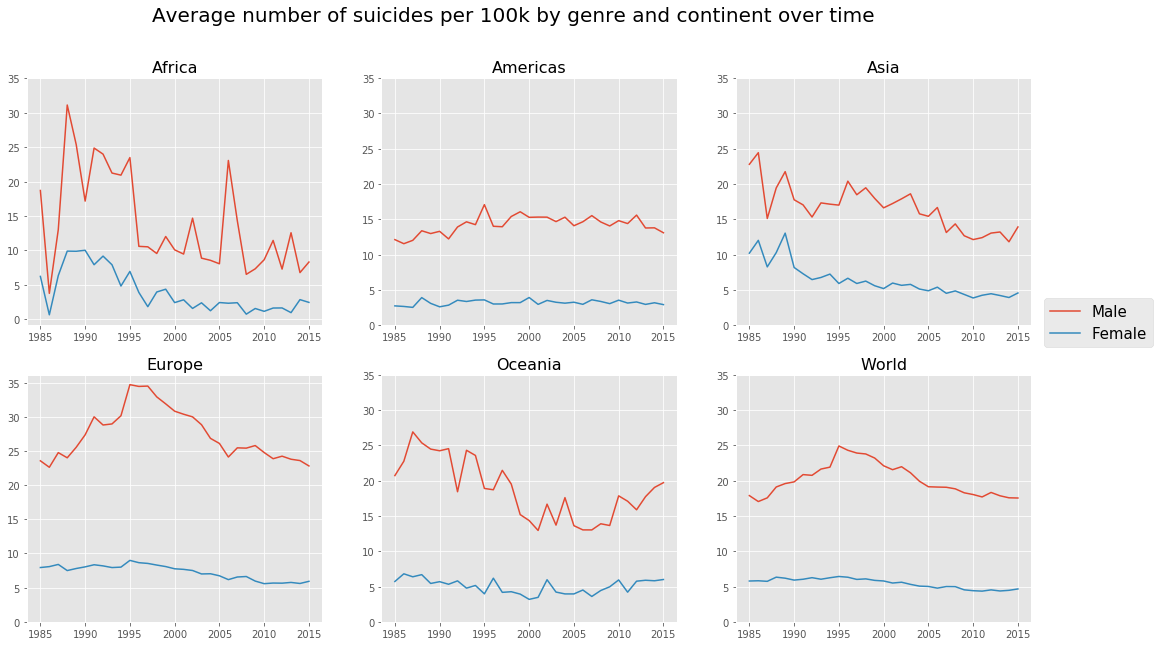

In [55]:
#Create dataframe with continents
df_sex = df[df['year'] < 2016].groupby(['year','sex','continent']).mean()['suicides_per_100k'].reset_index()

#Create dataframe with World average and put 'World' as continent
df_world = df[df['year'] < 2016].groupby(['year','sex']).mean()['suicides_per_100k'].reset_index()
df_world['continent'] = 'World'

#Concatenate both dataframes and create two new frames, one for each genre
df_sex = pd.concat([df_sex,df_world])
male2 = df_sex[df_sex['sex'] == 'male']
female2 = df_sex[df_sex['sex'] == 'female']

#Create list of unique continents (including 'World' as a continent)
continents = list(df_sex['continent'].unique())

#Plot!
fig, axs = plt.subplots(2,3)
fig.set_size_inches(18,10)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Loop through continents list
for idx, continent in enumerate(continents):
    #Male plot:
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    male_chart = male2[male2['continent'] == continent]
    x = male_chart['suicides_per_100k']
    y = male_chart['year']
    #To keep legend clean, I have this if statement, basically only the first continent will have label.
    #I've done that to avoid duplicates on the legend.
    if idx == 0:
        axs[chart_pos_0,chart_pos_1].plot(y,x, label='Male')
    else:
        axs[chart_pos_0,chart_pos_1].plot(y,x, label='_nolegend_')
    
    #Female plot:
    #Chart Position
    female_chart = female2[female2['continent'] == continent]
    x = female_chart['suicides_per_100k']
    y = female_chart['year']
    #If statement logic for labelling:
    if idx == 0:
        axs[chart_pos_0,chart_pos_1].plot(y,x, label='Female')
    else:
        axs[chart_pos_0,chart_pos_1].plot(y,x, label='_nolegend_')
    
    #Chart Title and Y Ticks
    axs[chart_pos_0,chart_pos_1].set_yticks(range(0,40,5))
    axs[chart_pos_0,chart_pos_1].set_title(continent,fontsize=16)
    
    
#Make legend visible
fig.legend(loc=5,fontsize=15)
fig.suptitle('Average number of suicides per 100k by genre and continent over time', fontsize=20);

- Africa: Male numbers are really volatile, but seems that it has a downward trend for both genres.
- Americas: Female numbers look really stable, while Male increased from 1985 to 1995 and stabilized since then, with a downward trend at the end. But overall, the numbers are below the World's numbers.
- Asia: Both lines have a downward trend with a decrease of almost 50% comparing peak to last numbers.
- Europe: Really close to World, female line has a downward trend, while Male grew until it peaked and since then it has been going down.
- Oceania: Female line looks really stable, while Male looks to be going up after it went down for years.

Through this analysis, I'm able to confirm that Male in all countries has higher numbers. In certain countries, the ratio between Men/Women is smaller than the average, but it's interesting to see that the difference is there. I'm curious to understand why exactly, I have some ideas, but nothing I could test with the data provided.

Another good observation is the similarity between Europe's and World's charts. My hypothesis is that our sample has more data from European countries and therefore when we look at total averages, we're actually looking at something that's really close to Europe.

In [12]:
#Count of Country by Continent
df_count = df.groupby(['continent','country']).count().reset_index()
df_count['count'] = 1
df_count.groupby('continent').sum()['count']

continent
Africa       4
Americas    31
Asia        24
Europe      38
Oceania      4
Name: count, dtype: int64

Yes, I was correct, we have more data for Europe, so I'd not advise doing general analysis using just averages, because it might be misleading. Although it depends on what you're trying to analyze ...

Anyway, I'm going ahead and try to use the 'age' column.

## By Age Analysis

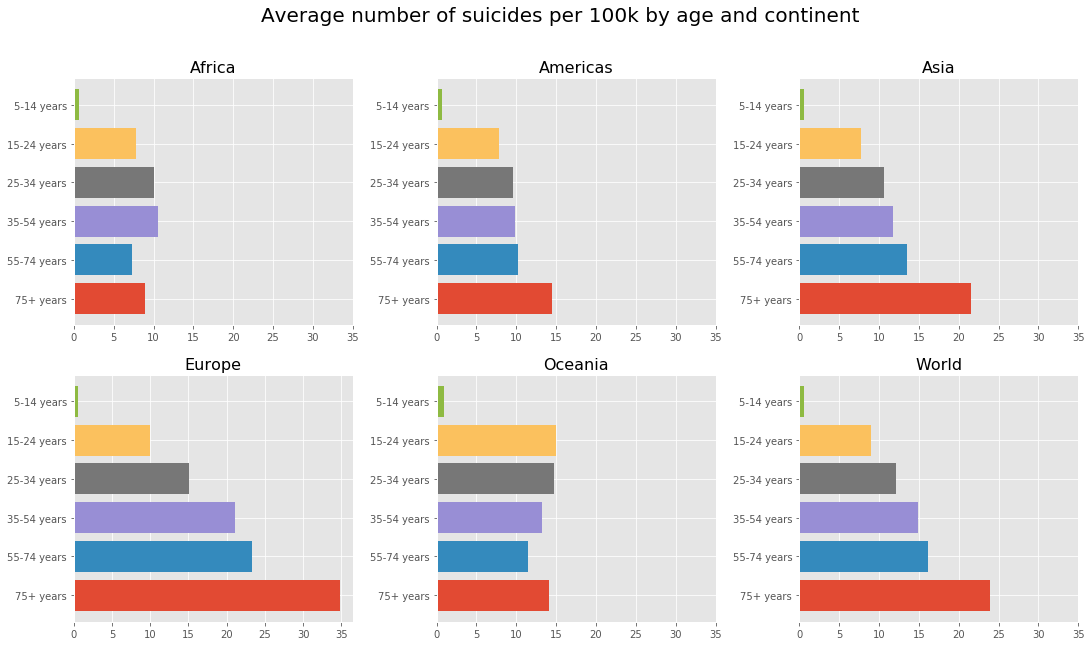

In [58]:
#Group data by 'age'.
#Create two dataframes: World and Continents, then merge them.
#World
age_df_world = df[df['year'] < 2016].groupby(['age']).mean()['suicides_per_100k'].reset_index()
age_df_world['continent'] = 'World'
#Continents and merge
age_df = df[df['year'] < 2016].groupby(['age','continent']).mean()['suicides_per_100k'].reset_index()
age_df = pd.concat([age_df, age_df_world])

#Create list of ages to loop through
ages_list = ['75+ years','55-74 years','35-54 years','25-34 years','15-24 years','5-14 years']
#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(18,10)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Loop through continents list
for idx, continent in enumerate(continents):
    for age_group in ages_list:
        #Chart Position
        chart_pos_0 = position[idx][0]
        chart_pos_1 = position[idx][1]
        age_df_chart = age_df[(age_df['age'] == age_group) & (age_df['continent'] == continent)]
        x = age_df_chart['suicides_per_100k']
        y = age_df_chart['age']
        axs[chart_pos_0,chart_pos_1].barh(y,x)
        #Chart Title and Y Ticks
        axs[chart_pos_0,chart_pos_1].set_xticks(range(0,36,5))
        axs[chart_pos_0,chart_pos_1].set_title(continent,fontsize=16)
    
#Title
fig.suptitle('Average number of suicides per 100k by age and continent', fontsize=20);

- World: Interesting distribution, I honestly don't hear a lot about 75+ suicides, so that's a surprise for me. Another surprise is how the number grows uniformly from the top to the bottom.
- Africa: All the numbers are below the World's averages, however, the distribution is different. As you can see, the concentration is in 25-34 and 35-54.
- Americas: Similar distribution to the World's, but also below on average.
- Europe: Above the average in all categories, it's surprising how 75+ is 10 more than the average.
- Asia: More 75+ relative to other categories than other continents.
- Oceania: The averages are around the same, but it's interesting to see how 15-24 and 25-34 are high and 55-74 and 75+ are low compared to others.

Next, I want to see this relationship over time ...

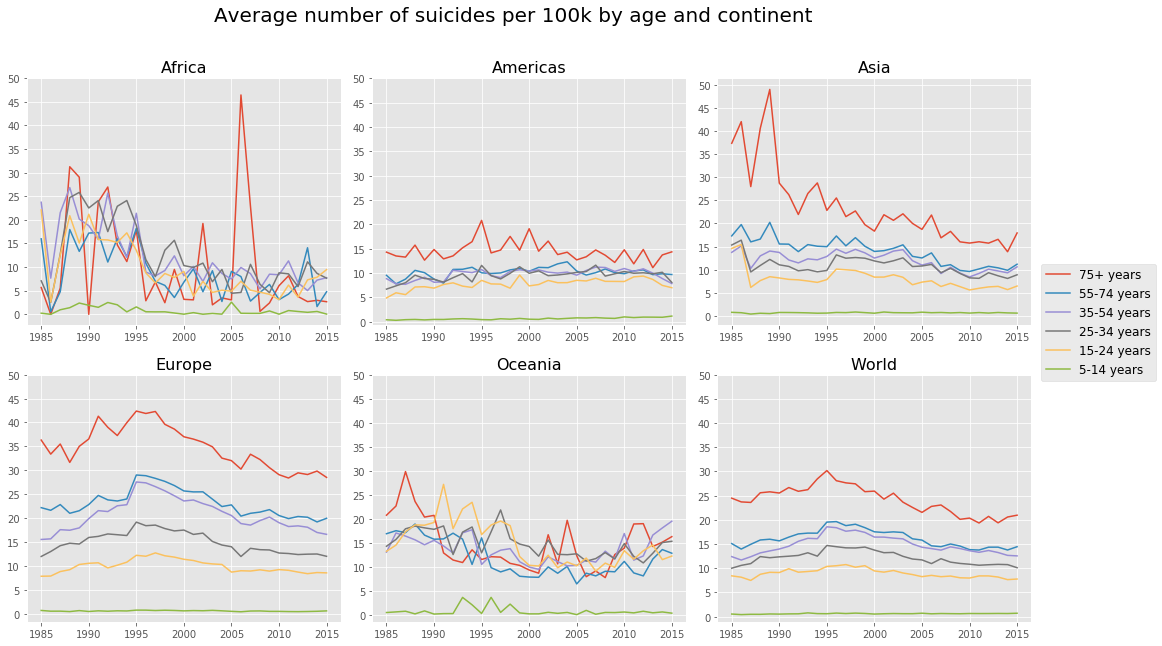

In [59]:
#Group data by 'age' and 'year'.
#Create two dataframes: World and Continents, then merge them.
#World
age_df_world = df[df['year'] < 2016].groupby(['age','year']).mean()['suicides_per_100k'].reset_index()
age_df_world['continent'] = 'World'
#Continents and merge
age_df = df[df['year'] < 2016].groupby(['age','year','continent']).mean()['suicides_per_100k'].reset_index()
age_df = pd.concat([age_df, age_df_world])

#Create list of ages to loop through

#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.1)
fig.set_size_inches(18,10)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Loop through continents list
for idx, continent in enumerate(continents):
    for age_group in ages_list:
        #Chart Position
        chart_pos_0 = position[idx][0]
        chart_pos_1 = position[idx][1]
        age_df_chart = age_df[(age_df['age'] == age_group) & (age_df['continent'] == continent)]
        x = age_df_chart['suicides_per_100k']
        y = age_df_chart['year']
        if idx == 0:
            axs[chart_pos_0,chart_pos_1].plot(y,x,label=age_group)
        else:
            axs[chart_pos_0,chart_pos_1].plot(y,x,label='_nolegend_')
        #Chart Title and Y Ticks
        axs[chart_pos_0,chart_pos_1].set_yticks(range(0,51,5))
        axs[chart_pos_0,chart_pos_1].set_title(continent,fontsize=16)
    
#Title and legend
fig.legend(loc=5,fontsize=12)
fig.suptitle('Average number of suicides per 100k by age and continent', fontsize=20);

- Africa: Lines seem to have a downward trend, even though they look really volatile. I also feel like there's something wrong with the peak around 2005 for 75+.
- Americas: 75+ seems to be going down, but it's really stable over time while the others present some increase. At the end though (2012-2015) the opposite happens, while other categories went down, 75+ went up.
- Asia: All ages are going down, but it's interesting to see how 75+ used to be really high.
- Europe and World: Similar charts, the only interesting point to make is that lines have a downward trend since the peak.
- Oceania: Similar to the average suicides by continent, you can see that all categories are going down until 2005, after that, they went up. What's really interesting is the 5-14 category, somewhere around 1993 and 1999, the number of suicides increased, it would be great to understand why.

## By country vs average
I'm interested in ranking countries by mean of suicides per 100k and compare it with the world average.

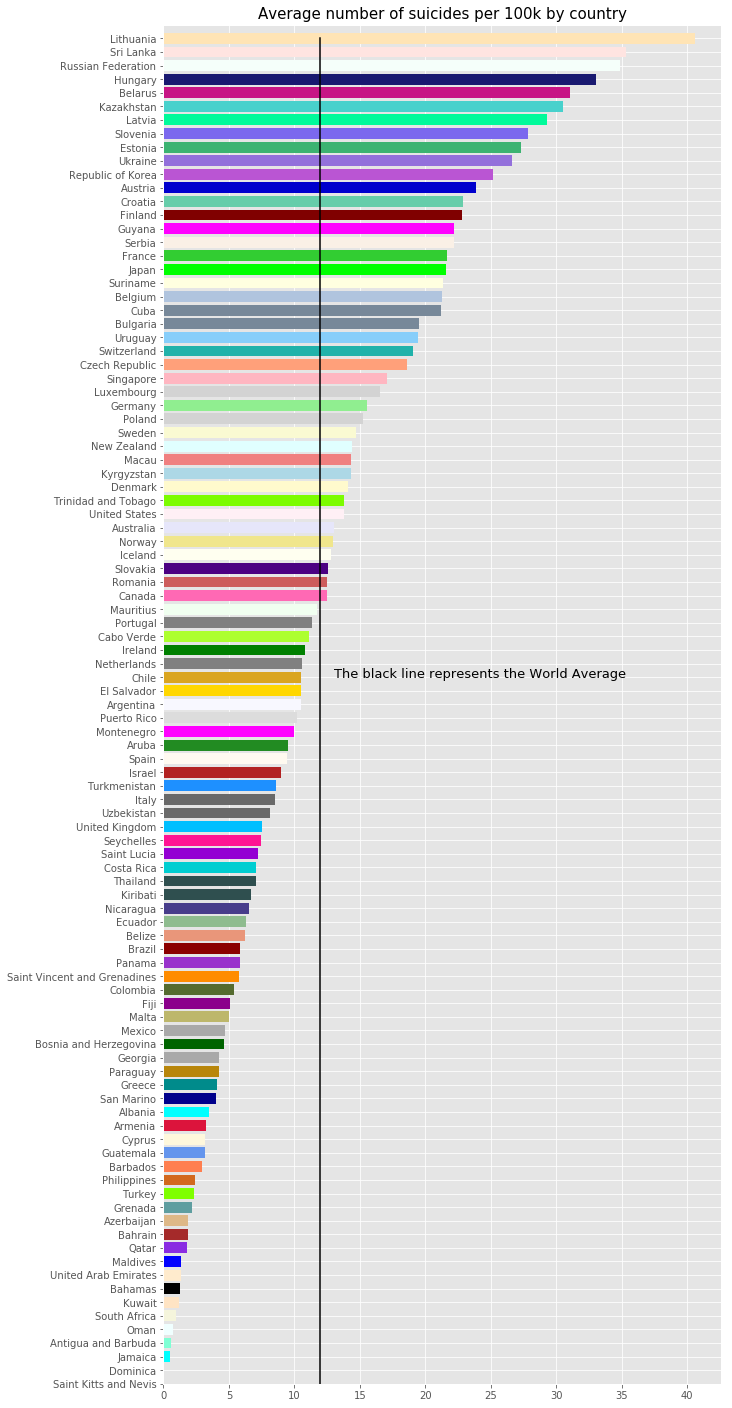

In [15]:
#Group by dataframe by country and calculate the mean of number of suicides per 100k
by_country = df[df['year'] < 2016].groupby('country').mean()['suicides_per_100k'].sort_values(ascending=True).reset_index()

#Plot!
fig, ax = plt.subplots(figsize=(10,25))
x = by_country['suicides_per_100k']
y = by_country['country']

#Create a list with colors available to loop through
colors = list(plt.cm.colors.cnames)
for i in range(0,len(x)):
    ax.barh(y[i],x[i],color=colors[i])

#Define limit of y axis
plt.ylim([0,y.size])

#Create horizontal line indicating the world average
ax.plot([x.mean(), x.mean()], [y[0],y[len(y)-1]], "-", color='black', label='World Average')
plt.text(13, 'Chile', 'The black line represents the World Average', fontsize=13)
plt.title('Average number of suicides per 100k by country', fontsize=15);

In [16]:
#Number of countries below World Average
by_country[by_country['suicides_per_100k'] < x.mean()].count()['country']
#Number of countries above World Average
by_country[by_country['suicides_per_100k'] > x.mean()].count()['country']
#Standard Deviation
by_country['suicides_per_100k'].std()
#Mean
by_country['suicides_per_100k'].mean()

11.969025075694187

Interesting, but more useful if you're analyzing one country specifically.
Regardless, here are some stats:
- Number of Countries above mean is 42.
- Number of Countries below mean is 58.
- Standard Deviation of 9.37.
- Mean of 11.97.

I'm curious to plot the distribution of suicides per 100k ...

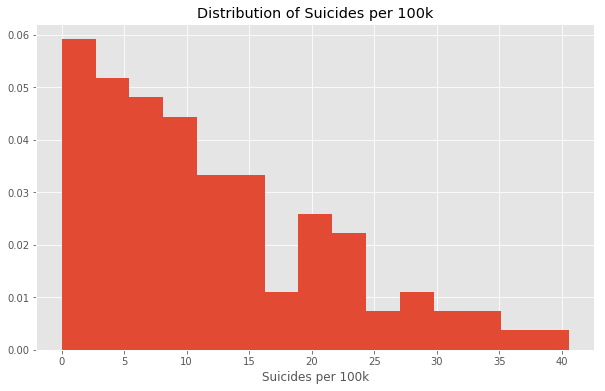

In [17]:
x = by_country['suicides_per_100k']
plt.figure(figsize=(10,6))
plt.hist(x, normed=True, bins=15)

plt.xlabel('Suicides per 100k')
plt.title('Distribution of Suicides per 100k');

Okay, now I want to see a clear distribution of countries that are Above Average vs Below Average by Continent.

In [18]:
#Create by continent data frame
by_continent = pd.merge(by_country,df[['country','continent']].drop_duplicates(['country','continent']),on='country')
by_continent['category'] = 0

#Run loop through data frame and classify each
for idx, country in enumerate(by_continent['country']):
    if by_continent['suicides_per_100k'][idx] > x.mean():
        by_continent['category'][idx] = 'Above Average'
    else:
        by_continent['category'][idx] = 'Below Average'

to_plot = by_continent.groupby(['continent','category']).count()['country'].reset_index()

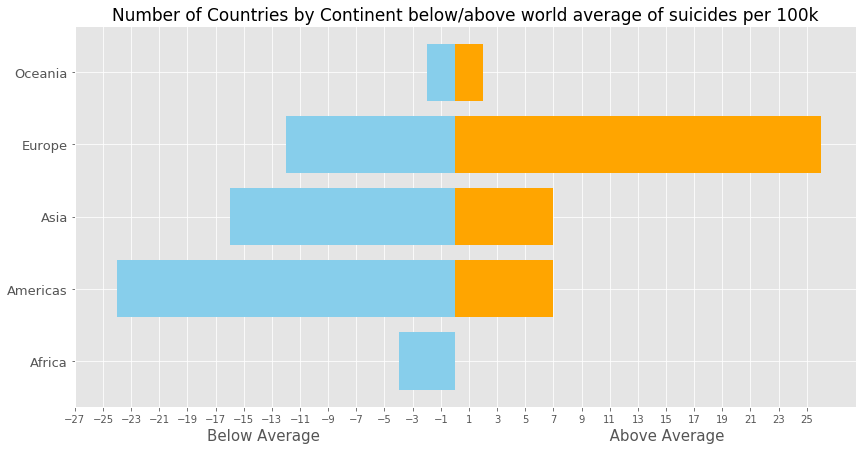

In [19]:
#Plot!
fig, ax = plt.subplots()
fig.set_size_inches(14,7)


#Loop through list of continents.
for idx, continent in enumerate(continents):
    x = to_plot[(to_plot['continent'] == continent) & (to_plot['category'] == 'Below Average')]['country'] 
    try:
        x2 = to_plot[(to_plot['continent'] == continent) & (to_plot['category'] == 'Above Average')]['country'] 
    except:
        x2 = 0
    
    ax.barh(continent,-x,color='skyblue')
    ax.barh(continent,x2,color='orange')

plt.title('Number of Countries by Continent below/above world average of suicides per 100k', fontsize = 17)
plt.yticks(fontsize = 13)
plt.xticks(np.arange(-max(to_plot['country'])-1, max(to_plot['country']+1), 2))
plt.xlabel('Below Average                                                             Above Average', fontsize=15,horizontalalignment='center')
plt.show();

Highlights:
- None of the African countries are above the world average.
- Most of the American and Asian countries are below average.
- Europe is the only continent with more countries above the average.

### Linear Regression Analysis
Now my idea is to understand the growth rate of each country using Linear Regression. Basically, I'm going to run a loop through a list of all countries, filter the dataset to show only data for that particular country, perform a Linear Regression on the data frame and store the coefficient of the ratio between 'Suicides Number/Population Number' if the p-value is less than 5%.

Another filter that I've added was a count of the number of years of data, only countries with at least 28 years worth of data will be part of this analysis. During the analysis, I realized some countries were throwing off my results because they didn't have enough data.

In [20]:
#First step is to create the ratio I mentioned above: Number of Suicides/Population
df_lr = df.groupby(['year','country']).sum()[['suicides_no','population']].reset_index()
df_lr['suicides_per_pop'] = df_lr['suicides_no']/df_lr['population']

#Import Linear model
from sklearn.linear_model import LinearRegression
from regressors import stats

#Create empty list to store my coefficients
coef_list = []

#Loop through list of countries
for country in df_lr['country'].unique():
    #Create temporary dataframe including only data for the country that I have on my loop
    df_model = df_lr[df_lr['country'] == country]
    #If we have more than 28 years of data ...
    if df_model.shape[0] > 28:
        #Create x and y
        x = np.array(df_model['year']).reshape(-1, 1)
        y = df_model['suicides_per_pop']
        #Instantiate model and train it with x and y
        lr_mod = LinearRegression()
        lr_mod.fit(x,y)
        #If p-value < 5%, store the coefficient
        if stats.coef_pval(lr_mod, x, y)[0] < 0.05:
            coef_list.append((country,(lr_mod.coef_[0]*10000)))

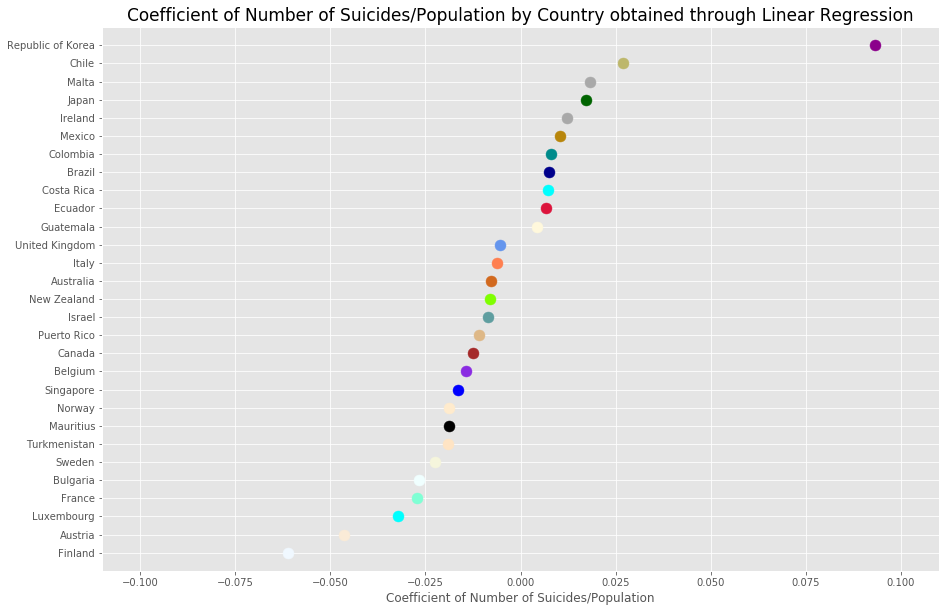

In [21]:
#Convert my list of results to a dataframe, with Country and Coefficient columns
df_coef = pd.DataFrame(coef_list, columns = ['country','coefficient']).sort_values('coefficient').reset_index(drop=True)

#Plot!
fig, ax = plt.subplots(figsize=(15,10))

#Visuals
plt.xlim(-0.11,0.11)
plt.ylim([-1,y.size])
plt.xlabel('Coefficient of Number of Suicides/Population')
plt.title('Coefficient of Number of Suicides/Population by Country obtained through Linear Regression', fontsize = 17);

#Plot each country by running a loop through list of countries
colors = list(plt.cm.colors.cnames)
for idx, country in enumerate(df_coef['country']):
    to_plot = df_coef[df_coef['country'] == country]
    plt.scatter(to_plot['coefficient'],country, label=country, s=120,c=colors[idx])

With this chart is easy to see in which countries the number of suicides grew over the last years. The countries with a positive coefficient have the number of suicides growing, while a negative coefficient means the opposite.

Highlights:

- The Republic of Korea has the highest coefficient, way more than any other country.
- Austria and Finland have the lowest coefficients, meaning that the number of suicides is decreasing.

It would be more interesting to see the same chart for different date periods, because on the chart above I'm running a Linear Regression in all available data for the country, with a minimum of 28 years. Therefore, it might not be the best way of analyzing all countries.

But I think there's a better way of doing that ...

Now, with the logic of using the coefficient to understand the trend in different countries, I'm going to create a function to make the same analysis using different date periods. My idea is to see the top 10 and bottom 10 countries over time, using different date periods (10 years, 9 years, 8 years and so on...).

For that, I'm going to create two functions that will give me the top/bottom 10 countries (top/bottom 10 with the highest/lowest coefficients). The only required variable is the number of years of analysis ('year') starting in 2015 and going back. Therefore, year=1 will calculate the coefficient for 2015-2014:

In [22]:
#Top 10 function
def coef_analysis_top_10(year=0):
    #Empty list to store results and instantiate the Linear Regression model
    results = []
    lm = linear_model.LinearRegression()
    
    #Since we must have at list 2 years of data to run a Linear Regression, this if statement will make sure if
    #year is zero, then it will return just the number of suicides per total population
    if year == 0:
        df_country = df.query('year < 2016').groupby(['country','year']).sum()[['population','suicides_no']].reset_index()
        df_country['suicides_per_pop'] = df_country['suicides_no']/df_country['population']
    #If year is not zero
    else:
        #Creating a dataframe including only the date period being analyzed
        start = 2015 - year
        year_filter = 'year > ' + str(start) + ' and year < 2016'
        df_country = df.query(year_filter).groupby(['country','year']).sum()[['population','suicides_no']].reset_index()
        df_country['suicides_per_pop'] = df_country['suicides_no']/df_country['population']

    #List of countries to loop through
    countries = df_country['country'].unique().tolist()    
    #For each country in list define y and X
    for country in countries:
        y = df_country[df_country['country'] == country]['suicides_per_pop']
        X = np.array(list(range(len(df_country[df_country['country'] == country]['suicides_per_pop']))))
        #Another good point is that we need to make sure there's enough years of data for the date period we're
        #trying to analyze, therefore, the if statement will calculate the coefficient only for countries 
        #in which we have 'year' worth of data.
        if len(X) == year: 
            #Train model, check p-value, if below 5% append to results list.
            lm.fit(X.reshape(-1, 1),y)
            if stats.coef_pval(lm, X.reshape(-1, 1), y)[0] < 0.05:
                coef = round(lm.coef_[0],10)
                results.append((country,coef))
    
    #Column Name of the result on the output dataframe
    column_name = str(year) + ' Years'
    
    #Convert list of results into a DataFrame, sort by number of suicides per pop and keep only top 10 countries
    all_time = pd.DataFrame(results, columns = [column_name,'suicides_per_pop']).sort_values('suicides_per_pop', ascending=False)
    all_time.drop('suicides_per_pop',1, inplace=True)
    position = pd.DataFrame(list(range(1,10)),columns=['top'])
    top_10 = all_time[:10].reset_index(drop=True)
    #Return result as a dataframe
    return pd.merge(position, top_10, left_index=True, right_index=True)

In [23]:
#Bottom 10 function: similar function, just the end is different
def coef_analysis_bottom_10(year=0):  
    results = []
    lm = linear_model.LinearRegression()

    if year == 0:
        df_country = df.query('year < 2016').groupby(['country','year']).sum()[['population','suicides_no']].reset_index()
        df_country['suicides_per_pop'] = df_country['suicides_no']/df_country['population']

    else:
        start = 2015 - year
        year_filter = 'year > ' + str(start) + ' and year < 2016'
        df_country = df.query(year_filter).groupby(['country','year']).sum()[['population','suicides_no']].reset_index()
        df_country['suicides_per_pop'] = df_country['suicides_no']/df_country['population']

    countries = df_country['country'].unique().tolist()    

    for country in countries:
        y = df_country[df_country['country'] == country]['suicides_per_pop']
        X = np.array(list(range(len(df_country[df_country['country'] == country]['suicides_per_pop']))))
        if len(X) == year: 
            lm.fit(X.reshape(-1, 1),y)
            if stats.coef_pval(lm, X.reshape(-1, 1), y)[0] < 0.05:
                coef = round(lm.coef_[0],10)
                results.append((country,coef))

    column_name = str(year) + ' Years'
    #Over here, instead of pulling the top 10, I want the bottom 10 countries.
    all_time = pd.DataFrame(results, columns = [column_name,'suicides_per_pop']).sort_values('suicides_per_pop', ascending=False)
    all_time.drop('suicides_per_pop',1, inplace=True)
    position = pd.DataFrame(list(range(1,11)),columns=['top'])
    bottom_10 = all_time[-10:].iloc[::-1].reset_index(drop=True)
    return pd.merge(position, bottom_10, left_index=True, right_index=True)

Both functions above will give me the top/bottom 10 countries by date period, but I need to merge all date periods into one big data frame and that's where the formula below comes in hand.

In [24]:
#Another function to merge results so I can compare contries
def merge_all(my_list, analysis='top'):
    #If top, run the coef_analysis_top_10 function for the list of years in my_list
    if analysis == 'top':
        for idx, years in enumerate(my_list):
            if idx == 0: 
                df1 = coef_analysis_top_10(years)
                result = df1.copy()
            else:
                df1 = coef_analysis_top_10(years)
                result = pd.merge(result,df1, on='top')
        return result
    #Otherwise, run the coef_analysis_bottom_10
    else:
        for idx, years in enumerate(my_list):
            if idx == 0: 
                df1 = coef_analysis_bottom_10(years)
                result = df1.copy()
            else:
                df1 = coef_analysis_bottom_10(years)
                result = pd.merge(result,df1, on='top')
        return result

In [25]:
#Okay, it's finally time to run all those functions at take a look at the results
top = merge_all([10,9,8,7,6,5,4,3,2],'top')
bottom = merge_all([10,9,8,7,6,5,4,3,2],'bottom')

### Top 10 Countries with highest growth rate in number of suicides per population by date period:

In [26]:
top

,top,10 Years,9 Years,8 Years,7 Years,6 Years,5 Years,4 Years,3 Years,2 Years
0,1,Belize,Belize,Belize,Australia,Georgia,Iceland,Georgia,Luxembourg,Seychelles
1,2,Republic of Korea,Netherlands,Seychelles,Georgia,Australia,Georgia,Luxembourg,Malta,Ecuador
2,3,Netherlands,Greece,Netherlands,Seychelles,Greece,Malta,Malta,Ecuador,Slovenia
3,4,United States,United States,Greece,Netherlands,Netherlands,Australia,Belize,Belize,Uruguay
4,5,Greece,Australia,Australia,Greece,Spain,Seychelles,Australia,Uruguay,Saint Vincent and Grenadines
5,6,Cyprus,Seychelles,United States,United States,Malta,Luxembourg,Uruguay,Georgia,Norway
6,7,Australia,Cyprus,Malta,Iceland,United States,Cyprus,Norway,Australia,Armenia
7,8,Iceland,Iceland,Luxembourg,Belize,Seychelles,Netherlands,United States,Croatia,Croatia
8,9,Mexico,Malta,Iceland,Cyprus,Cyprus,United States,Qatar,Qatar,Cuba


Notice that some countries are present in almost all date periods. 
Let's take a deeper look at those! 

Below, I'm figuring out the top 6 countries based on the number of counts, therefore, if a country is present 6 times, it's because we have it 6 times on the chart above.

In [27]:
#Create a dataframe with the ratio of total number of suicides divided by population.
year = 10
start = 2015 - year
year_filter = 'year > ' + str(start) + ' and year < 2016'
df_country = df.query(year_filter).groupby(['country','year']).sum()[['population','suicides_no']].reset_index()
df_country['suicides_per_pop'] = df_country['suicides_no']/df_country['population']

In [28]:
#Figure out top 6 countries with highest counts on the chart above
#Run loop through columns and store countries in top_list
top_list = []
for column in top.columns[::-1][:-1]:
    for country in top[column]:
        top_list.append(country)

#Count of values on that list and give me the top 6
list_of_countries = pd.DataFrame(top_list,columns=['country'])['country'].value_counts()[:6].reset_index()['index']

Now with the list of countries in hand, let's plot the Ratio of Total Suicides/Population from 2006 to 2015.

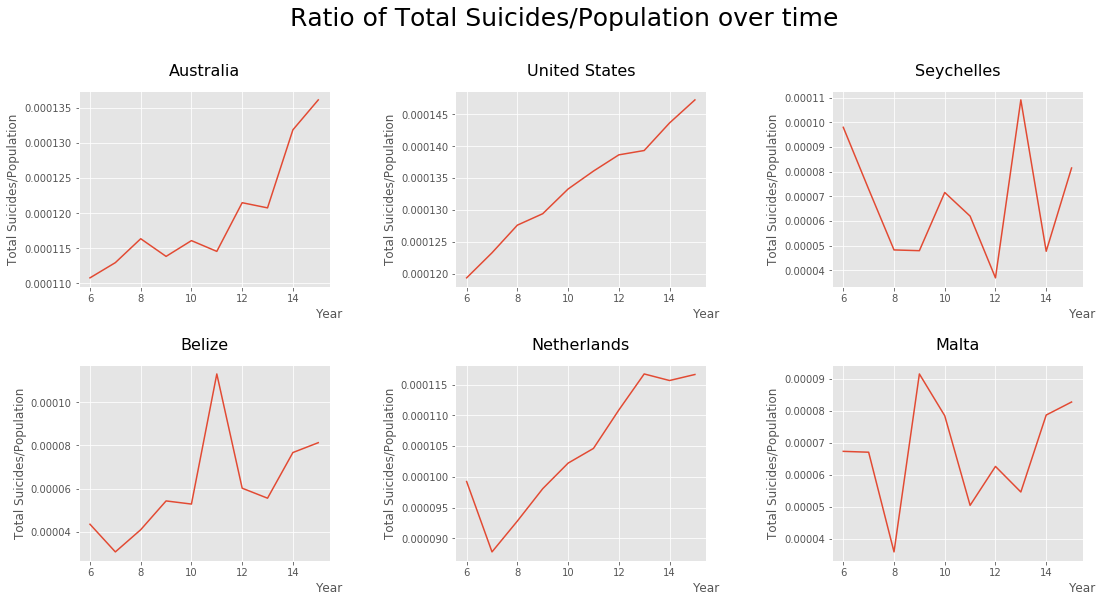

In [29]:
#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.5, hspace = 0.4 )
fig.set_size_inches(18,9)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Loop through countries list
for idx, country in enumerate(list_of_countries):
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    #Filter dataset and create x and y
    to_plot = df_country[df_country['country'] == country]
    x = to_plot['year'] - 2000
    y = to_plot['suicides_per_pop']
    #Plot Values and set Title, X and Y labels
    axs[chart_pos_0,chart_pos_1].plot(x,y)
    axs[chart_pos_0,chart_pos_1].set_title(country,fontsize=16,y=1.05)
    axs[chart_pos_0,chart_pos_1].set_xlabel('Year',position=(1,1))
    axs[chart_pos_0,chart_pos_1].set_ylabel('Total Suicides/Population')
    
#Matrix Title
plt.subplots_adjust(top=0.85)
fig.suptitle('Ratio of Total Suicides/Population over time', fontsize=25);

### Top 10 Countries with lowest growth rate in number of suicides per population by date period:

In [30]:
bottom

,top,10 Years,9 Years,8 Years,7 Years,6 Years,5 Years,4 Years,3 Years,2 Years
0,1,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Hungary,Hungary,Hungary,Lithuania,Estonia
1,2,Kazakhstan,Kazakhstan,Kazakhstan,Kazakhstan,Russian Federation,Saint Vincent and Grenadines,Kazakhstan,Kazakhstan,Kazakhstan
2,3,Turkmenistan,Turkmenistan,Hungary,Hungary,Republic of Korea,Republic of Korea,Russian Federation,Iceland,Iceland
3,4,Finland,Japan,Finland,Japan,Kazakhstan,Russian Federation,Finland,Finland,Poland
4,5,Japan,Hungary,Japan,Finland,Japan,Japan,Czech Republic,Seychelles,Mauritius
5,6,Hungary,Finland,Turkmenistan,Republic of Korea,Finland,Kazakhstan,Japan,Russian Federation,Denmark
6,7,Switzerland,Switzerland,Latvia,Latvia,Saint Vincent and Grenadines,Finland,Poland,Japan,Finland
7,8,Saint Vincent and Grenadines,Saint Vincent and Grenadines,Switzerland,Lithuania,Belgium,Belgium,Serbia,Hungary,Russian Federation
8,9,Serbia,Latvia,Chile,Serbia,Latvia,Latvia,Estonia,Poland,Panama
9,10,Latvia,Serbia,Lithuania,Estonia,Israel,Serbia,Kyrgyzstan,Republic of Korea,Japan


In [31]:
#Figure out top 6 countries with highest counts on the chart above
#Run loop through columns and store countries in top_list
top_list = []
for column in top.columns[::-1][:-1]:
    for country in bottom[column]:
        top_list.append(country)

#Count of values on that list and give me the top 6
list_of_countries = pd.DataFrame(top_list,columns=['country'])['country'].value_counts()[:6].reset_index()['index']

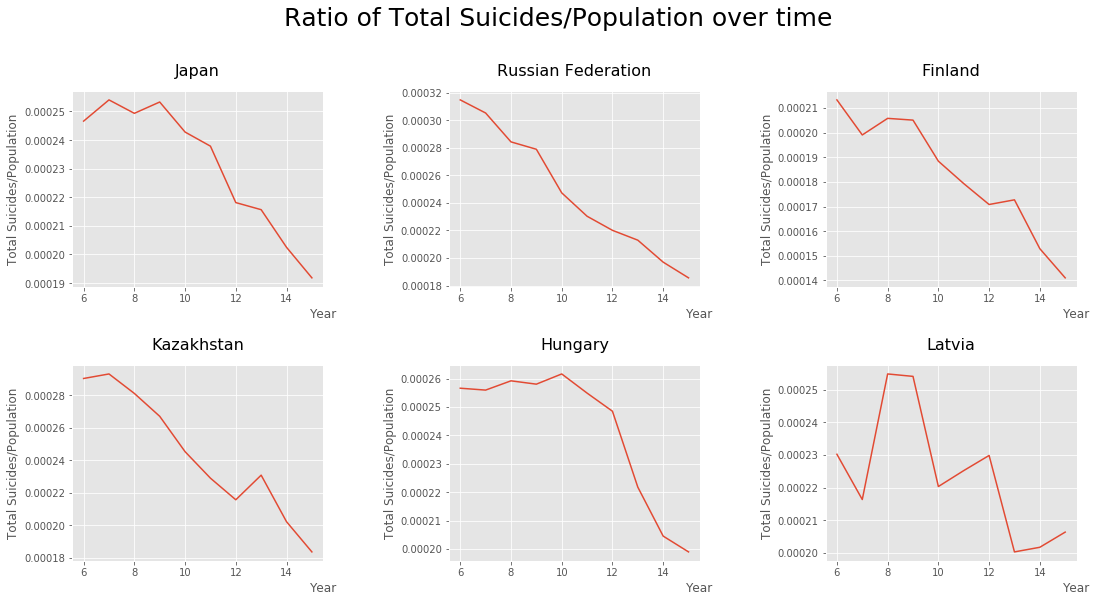

In [32]:
#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.5, hspace = 0.4 )
fig.set_size_inches(18,9)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Loop through countries list
for idx, country in enumerate(list_of_countries):
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    #Filter dataset and create x and y
    to_plot = df_country[df_country['country'] == country]
    x = to_plot['year'] - 2000
    y = to_plot['suicides_per_pop']
    #Plot Values and set Title, X and Y labels
    axs[chart_pos_0,chart_pos_1].plot(x,y)
    axs[chart_pos_0,chart_pos_1].set_title(country,fontsize=16,y=1.05)
    axs[chart_pos_0,chart_pos_1].set_xlabel('Year',position=(1,1))
    axs[chart_pos_0,chart_pos_1].set_ylabel('Total Suicides/Population')
    
#Matrix Title
plt.subplots_adjust(top=0.85)
fig.suptitle('Ratio of Total Suicides/Population over time', fontsize=25);

Now with both charts, we can start analyzing those countries deeper and try to understand exactly what measures were taken in order to reduce suicides. Then, a comparison could be made to see if there is anything countries with high suicides rates could do to reduce it.

## Cluster Analysis

Next, a Cluster Analysis will be performed to understand the relationship between two factors: Number of Suicides per Population by GDP per Capita. And how countries are grouped based on them.

My theory is that the lower the GDP, the more suicides you should have because the lower GDP also translates into the low quality of life most of the time.

For that, I'm going to use the K-Means Clustering method. The K-Means forms clusters based on the closeness to the center value of the clusters and the number of clusters is defined before I run the model.

In [33]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans #For clustering

In [34]:
#Create doKmeans function which basically instantiate the model, fit and then return the clusters.
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust) #instantiate model
    model.fit(X) #fit model
    clust_labels = model.predict(X) #run model on my dataset
    cent = model.cluster_centers_ #assign cluster centers to a variable
    return (clust_labels, cent) #return cluster labels and cluster centers

Next I'll run the model for the previous 6 years and see if the relationship is consistent.

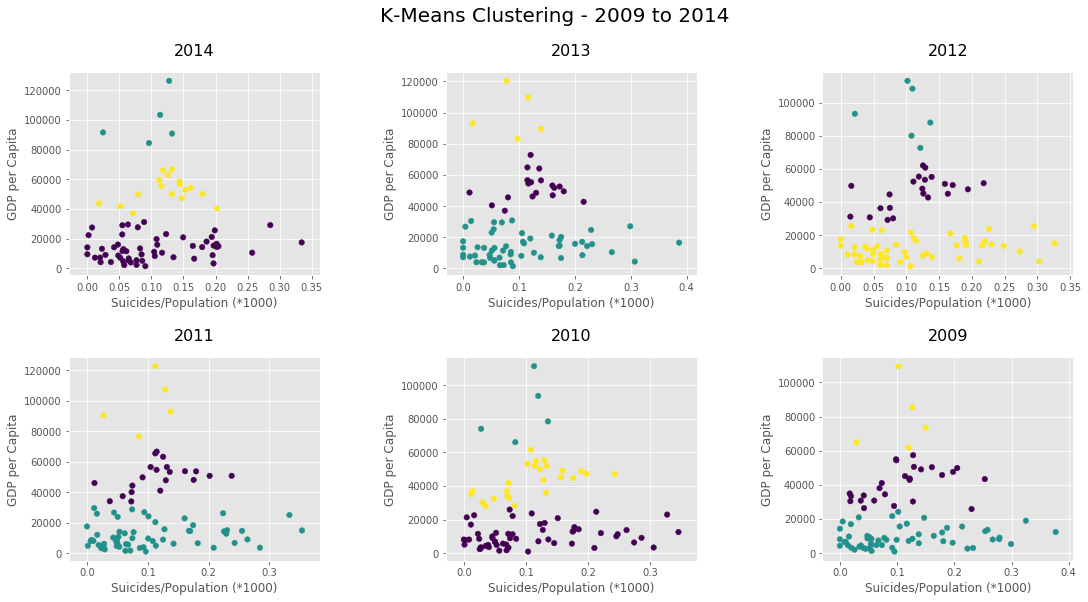

In [35]:
#Create list of years
years = [2014,2013,2012,2011,2010,2009]

#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.5, hspace = 0.4 )
fig.set_size_inches(18,9)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

for idx, year in enumerate(years):
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    
    #Filter data and create dataframe to plot
    df_analysis = df.groupby(['country','year']).sum()[['suicides_no','population']].reset_index()
    df_analysis['suicides_per_pop'] = df_analysis['suicides_no']/df_analysis['population'] * 1000
    df_analysis = pd.merge(df_analysis,df[['country','year','gdp_per_capita']].drop_duplicates(),on=['country','year'])
    df_to_plot = df_analysis[df_analysis['year'] == year][['suicides_per_pop','gdp_per_capita']].reset_index(drop=True)

    #Scaling of data, it's important to normalize the data to avoid overfitting
    ss = StandardScaler()
    ss.fit_transform(df_to_plot)
    
    #Defining kmeans
    clust_labels, cent = doKmeans(df_to_plot, 3) #run model on my data
    kmeans = pd.DataFrame(clust_labels) #put cluster values into kmeans
    df_to_plot.insert((df_to_plot.shape[1]),'kmeans',kmeans)
    
    #Plot the clusters obtained using k means
    scatter = axs[chart_pos_0,chart_pos_1].scatter(df_to_plot['suicides_per_pop'],df_to_plot['gdp_per_capita'],c=kmeans[0],s=30)
    axs[chart_pos_0,chart_pos_1].set_xlabel('Suicides/Population (*1000)')
    axs[chart_pos_0,chart_pos_1].set_ylabel('GDP per Capita')
    axs[chart_pos_0,chart_pos_1].set_title(year,fontsize=16,y=1.05);

fig.suptitle('K-Means Clustering - 2009 to 2014', fontsize=20);   

Apparently, there's a pattern that confirms my theory and I can see three consistent groups ...

I'm going to run the same analysis for the whole data frame, including all years by Continent

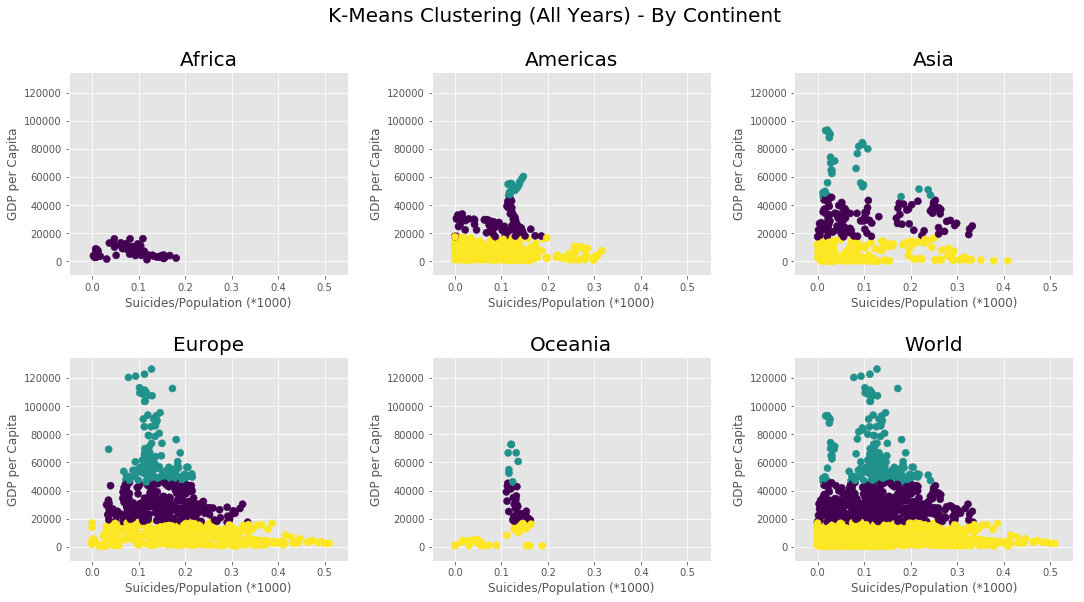

In [36]:
#All Years!
df_analysis = df.groupby(['country','year']).sum()[['suicides_no','population']].reset_index()
df_analysis['suicides_per_pop'] = df_analysis['suicides_no']/df_analysis['population'] * 1000
df_analysis = pd.merge(df_analysis,df[['country','year','gdp_per_capita','continent']].drop_duplicates(),on=['country','year'])
df_to_plot = df_analysis[['suicides_per_pop','gdp_per_capita','continent']].reset_index(drop=True)

#Scaling of data
ss = StandardScaler()
ss.fit_transform(df_to_plot[['suicides_per_pop','gdp_per_capita']])

#defining kmeans
clust_labels, cent = doKmeans(df_to_plot[['suicides_per_pop','gdp_per_capita']], 3)
kmeans = pd.DataFrame(clust_labels)
df_to_plot.insert((df_to_plot.shape[1]),'kmeans',kmeans)

#Create Custom list for loop
continents = ['Africa','Americas','Asia','Europe','Oceania','World']

#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4 )
fig.set_size_inches(18,9)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

#Plot K-means by continent
for idx, continent in enumerate(continents):
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    
    #If statement to plot World differently
    if continent == 'World':
        scatter = axs[chart_pos_0,chart_pos_1].scatter(df_to_plot['suicides_per_pop'],df_to_plot['gdp_per_capita'],c=kmeans[0],s=50)#,label=kmeans[0])
        axs[chart_pos_0,chart_pos_1].set_title(continent, fontsize=20)
        axs[chart_pos_0,chart_pos_1].set_xlabel('Suicides/Population (*1000)')
        axs[chart_pos_0,chart_pos_1].set_ylabel('GDP per Capita')
        axs[chart_pos_0,chart_pos_1].set_xlim(xmin=-0.05, xmax=0.55)
        axs[chart_pos_0,chart_pos_1].set_ylim(ymin=-10000, ymax=135000)
        
    else:
        temp_df = df_to_plot[df_to_plot['continent'] == continent]
        scatter = axs[chart_pos_0,chart_pos_1].scatter(temp_df['suicides_per_pop'],temp_df['gdp_per_capita'],c=temp_df['kmeans'],s=50)#,marker=mark)
        axs[chart_pos_0,chart_pos_1].set_title(continent, fontsize=20)
        axs[chart_pos_0,chart_pos_1].set_xlabel('Suicides/Population (*1000)')
        axs[chart_pos_0,chart_pos_1].set_ylabel('GDP per Capita')
        axs[chart_pos_0,chart_pos_1].set_xlim(xmin=-0.05, xmax=0.55)
        axs[chart_pos_0,chart_pos_1].set_ylim(ymin=-10000, ymax=135000)
        
fig.suptitle('K-Means Clustering (All Years) - By Continent', fontsize=20);

### World Analysis:

My hypothesis was partially correct, as you can see above, relative to Low GDP countries, High GDP countries have fewer suicides, however, it makes more sense to see how the 'Suicides/Population' ratio is spread in Low GDP countries. 

The 'World' chart looks like a half pyramid, as you go up in GDP, the right side of your range of Suicides/Population starts going down, which means that it's harder to have high levels of Suicides/Population in high GDP countries.

However, it's interesting to point out that most High GDP countries don't have really low (close to 0) level of Suicides/Population. If you look at Low and Medium GDPs, it's possible to see a lot of countries between 0 and 0.1, while in High GDPs, the number is concentrated between 0.09-0.2.

From the K-Means analysis we have three groups:
- Purple: Low GDP with spread levels of Suicides/Population (0 to 0.5).
- Yellow: Medium GDP with fewer spread levels of Suicides/Population (0 to 0.32).
- Green: High GDP with even fewer spread levels of Suicides/Population (0 to 0.25).

### Continent Analysis:
- Africa and Oceania: Both continents have low levels of Suicides/Population compared to others. Particularly for 'Oceania', I can see a line around 0.12 Suicides/Population going up, which means that the ratio is constant regardless of GDP.
- Americas: Clearly have more countries than Africa and Oceania, but I can also see a similar line as GDP goes up to around 0.12 Suicides/Population too. However, it's more common to have levels of Suicides below 0.1 and I see some countries above the 0.2 level.
- Asia: The chart is more spread, with less concentration and following the same 'half pyramid' structure that we have in 'World'.
- Europe: Not surprising, really close to 'World'.

The next step is to create categories for those groups and see the distribution by Continent.

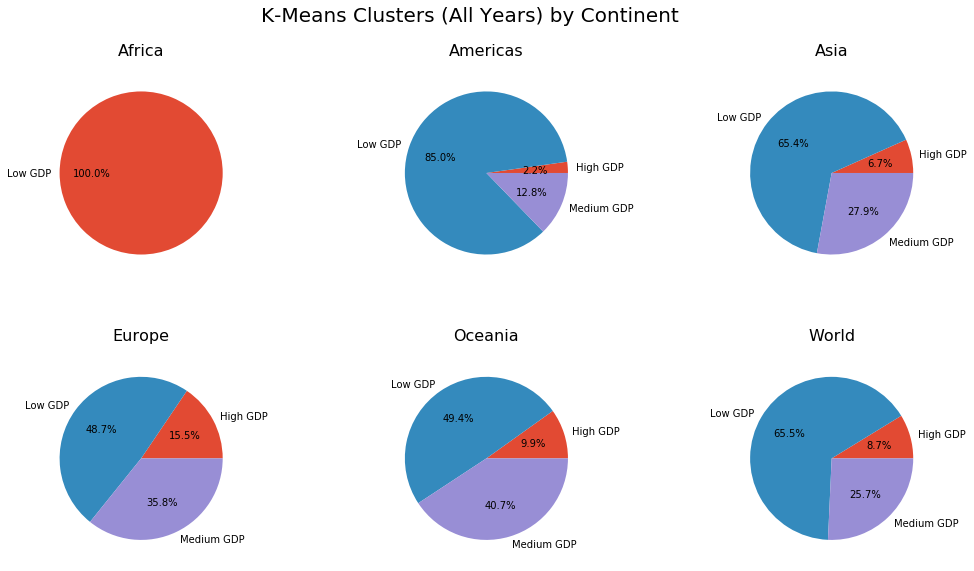

In [46]:
#Creating a list of categories
categories = [(2,'Low GDP'),(1,'High GDP'),(0,'Medium GDP')]

#Merge plot data frame with my categories
df_cat = pd.merge(df_to_plot,pd.DataFrame(categories,columns=['kmeans','category']),on='kmeans')[['continent','category','kmeans']]
to_plot = df_cat.groupby(['continent','category']).count()['kmeans'].reset_index()
world = to_plot.groupby('category').sum()['kmeans'].reset_index()
world['continent'] = 'World'
to_plot = pd.concat([to_plot,world])

#Plot!
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace = 0.1, hspace = 0.4 )
fig.set_size_inches(18,9)

#Chart Position on the matrix
position = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

for idx, continent in enumerate(to_plot['continent'].unique()):
    #Chart Position
    chart_pos_0 = position[idx][0]
    chart_pos_1 = position[idx][1]
    
    #Create data frame to plot
    plot_me = to_plot[to_plot['continent'] == continent][['category','kmeans']]
    count = plot_me['kmeans']
    labels = plot_me['category']
    
    #Plot!
    axs[chart_pos_0,chart_pos_1].pie(count,labels=labels,autopct='%1.1f%%')
    axs[chart_pos_0,chart_pos_1].set_title(continent,fontsize=16,y=1.05);

#Title
fig.suptitle('K-Means Clusters (All Years) by Continent', fontsize=20);   

For this analysis, I kept the same categories but I labeled them as:
- Low GDP
- Medium GDP
- High GDP

Above you can see the distributions, but I'm more interested in seeing the same distribution by category.

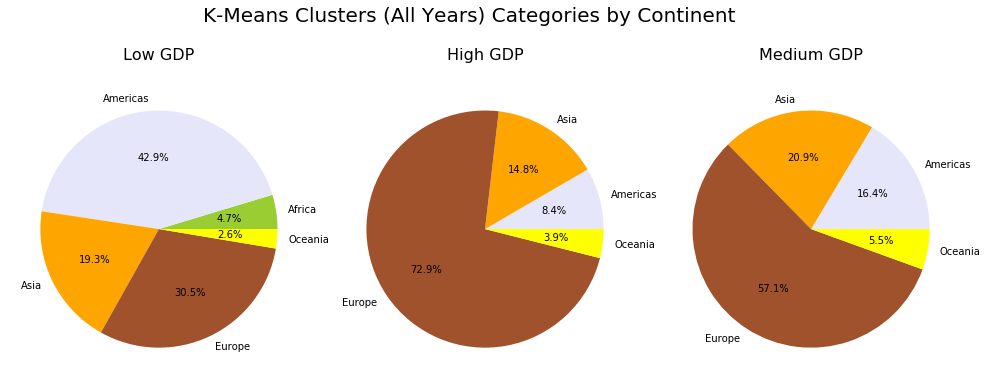

In [45]:
#Creating a list of categories
categories = [(2,'Low GDP'),(1,'High GDP'),(0,'Medium GDP')]

#Merge plot data frame with my categories
df_cat = pd.merge(df_to_plot,pd.DataFrame(categories,columns=['kmeans','category']),on='kmeans')[['continent','category','kmeans']]
to_plot2 = df_cat.groupby(['continent','category']).count()['kmeans'].reset_index()

#Colors
colors_df =  pd.DataFrame([('Africa','yellowgreen'), ('Americas','lavender'), ('Asia','orange'), ('Europe','sienna'), ('Oceania','yellow')], columns=['continent','color'])
to_plot2 = pd.merge(to_plot2, colors_df, on='continent')

#Plot!
fig, axs = plt.subplots(1,3)
plt.subplots_adjust(wspace = 0.1, hspace = 0.4 )
fig.set_size_inches(17,9)

for idx, category in enumerate(to_plot2['category'].unique()):
    #Create temporaty data frame to plot
    plot_me = to_plot2[to_plot2['category'] == category][['continent','kmeans','color']]
    count = plot_me['kmeans']
    labels = plot_me['continent']
    colors = plot_me['color']
    
    #Plot
    axs[idx].pie(count,labels=labels,autopct='%1.1f%%', colors=colors)
    axs[idx].set_title(category,fontsize=16,y=1.05);

#Title
fig.suptitle('K-Means Clusters (All Years) Categories by Continent', fontsize=20)
fig.subplots_adjust(top=1.15);   

### Category Analysis:
- Low GDP: Europe and the Americas represent 73% of the category, with Asia coming next at 19%.
- Medium GDP: Europe represents 57%, with Asia coming next at 20%.
- High GDP: Europe represents 73%.

Because we have more data for European countries, I'm not surprised to see that Europe has a big portion of all categories with a bigger concentration on High and Medium GDP categories.

The opposite applies for 'Americas', with more representation in Low and Medium GDP categories. It's surprising though that 'Americas' is bigger than 'Europe' in Low GDP even though 'Europe' has a bigger representation overall.